In [17]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [18]:
murders = read.csv('data/murders.csv.xz')

In [19]:
str(murders)

'data.frame':	51 obs. of  6 variables:
 $ State            : Factor w/ 51 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Population       : int  4779736 710231 6392017 2915918 37253956 5029196 3574097 897934 601723 19687653 ...
 $ PopulationDensity: num  94.65 1.26 57.05 56.43 244.2 ...
 $ Murders          : int  199 31 352 130 1811 117 131 48 131 987 ...
 $ GunMurders       : int  135 19 232 93 1257 65 97 38 99 669 ...
 $ GunOwnership     : num  0.517 0.578 0.311 0.553 0.213 0.347 0.167 0.255 0.036 0.245 ...


In [20]:
statesMap = map_data('state')

In [21]:
str(statesMap)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


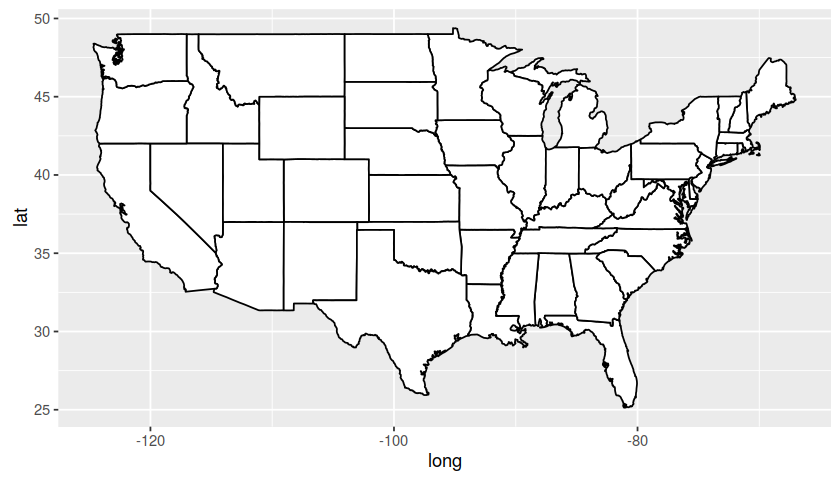

In [22]:
options(repr.plot.width=7, repr.plot.height=4)
ggplot(statesMap, aes(x=long, y=lat, group=group)) +
    geom_polygon(fill='white', color='black')

In [23]:
murders$region = tolower(murders$State)
murderMap = merge(statesMap, murders, by='region')
str(murderMap)

'data.frame':	15537 obs. of  12 variables:
 $ region           : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ long             : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat              : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group            : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ subregion        : chr  NA NA NA NA ...
 $ State            : Factor w/ 51 levels "Alabama","Alaska",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Population       : int  4779736 4779736 4779736 4779736 4779736 4779736 4779736 4779736 4779736 4779736 ...
 $ PopulationDensity: num  94.7 94.7 94.7 94.7 94.7 ...
 $ Murders          : int  199 199 199 199 199 199 199 199 199 199 ...
 $ GunMurders       : int  135 135 135 135 135 135 135 135 135 135 ...
 $ GunOwnership     : num  0.517 0.517 0.517 0.517 0.517 0.517 0.517 0.517 0.517 0.517 ...


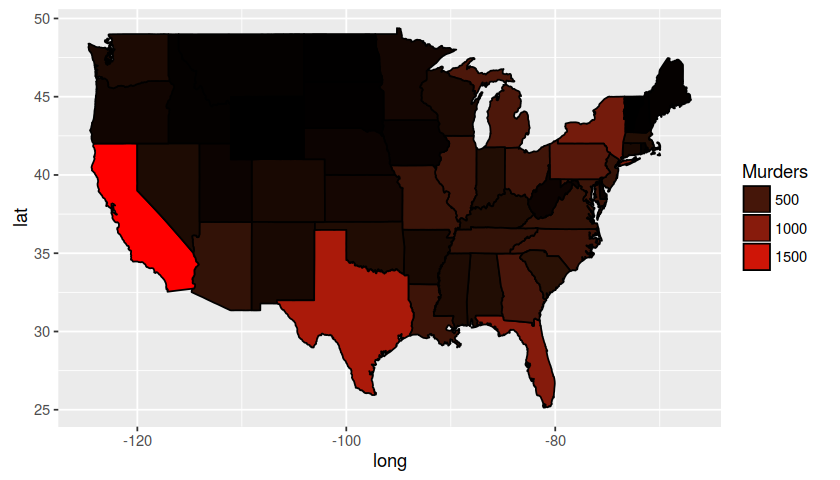

In [24]:
ggplot(murderMap, aes(x=long, y=lat, group=group, fill=Murders)) +
    geom_polygon(color='black') +
    scale_fill_gradient(low='black', high='red', guide='legend')

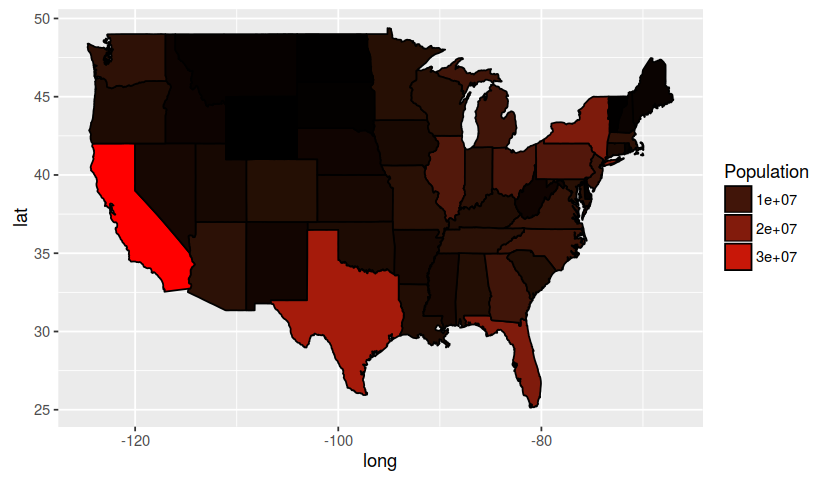

In [25]:
ggplot(murderMap, aes(x=long, y=lat, group=group, fill=Population)) +
    geom_polygon(color='black') +
    scale_fill_gradient(low='black', high='red', guide='legend')

In [26]:
murderMap$MurderRate = murderMap$Murders / murderMap$Population * 100000

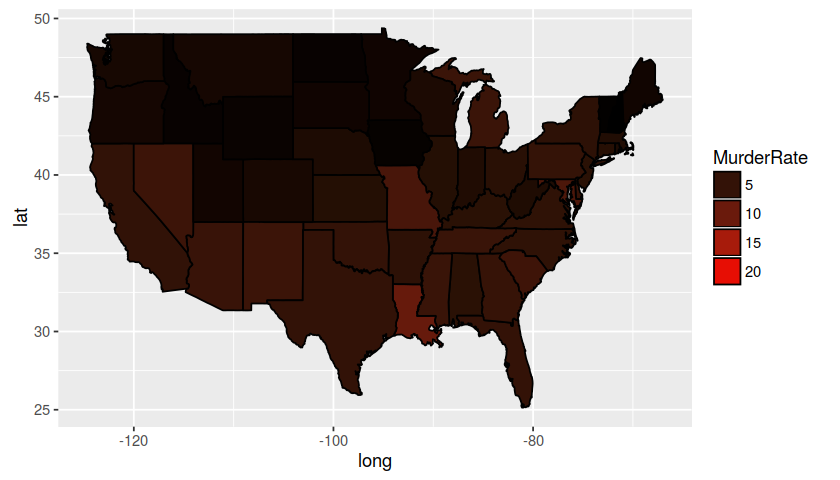

In [27]:
ggplot(murderMap, aes(x=long, y=lat, group=group, fill=MurderRate)) +
    geom_polygon(color='black') +
    scale_fill_gradient(low='black', high='red', guide='legend')

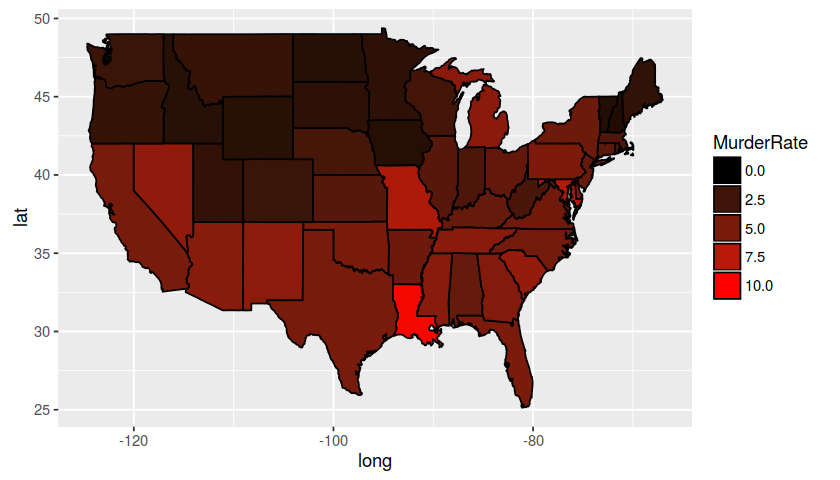

In [28]:
ggplot(murderMap, aes(x=long, y=lat, group=group, fill=MurderRate)) +
    geom_polygon(color='black') +
    scale_fill_gradient(low='black', high='red', guide='legend',
                        limits=c(0,10))

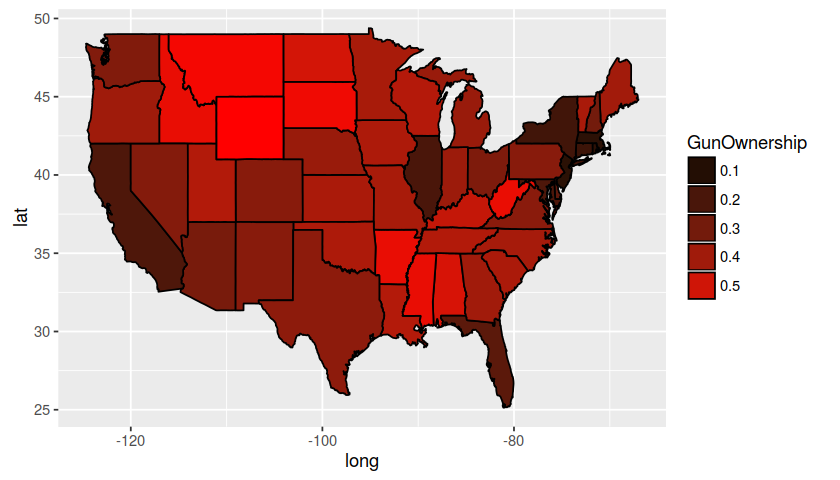

In [30]:
ggplot(murderMap, aes(x=long, y=lat, group=group, fill=GunOwnership)) +
    geom_polygon(color='black') +
    scale_fill_gradient(low='black', high='red', guide='legend')